## Author  :- Mohit Bhadauria
<h1 style="color:blue" align="center">Task 3:- Exploratory Data Analysis - Retail</h1>
<h2 style="color:green">In this task we will try to find out the weak areas where we can work to make more profit.</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


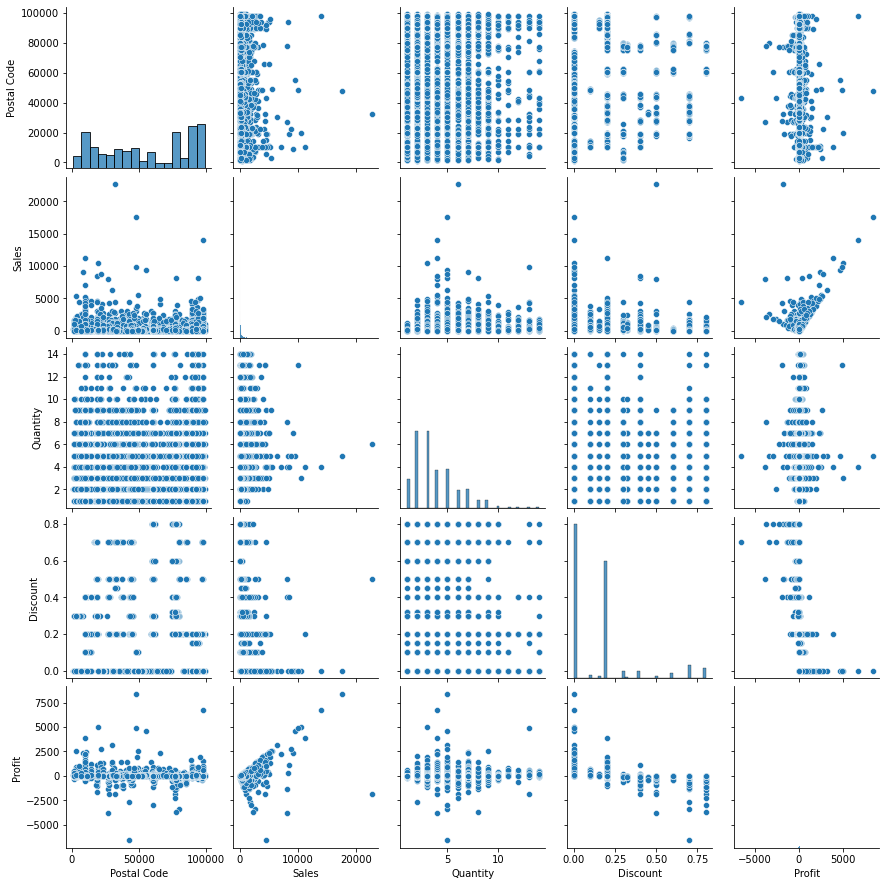

In [3]:
sns.pairplot(df)

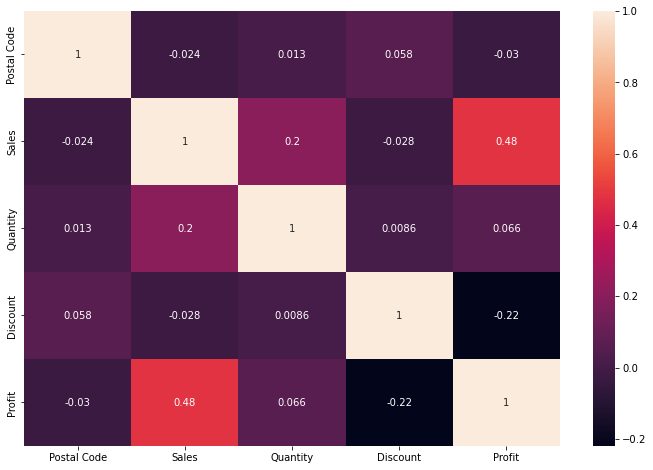

In [4]:
df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

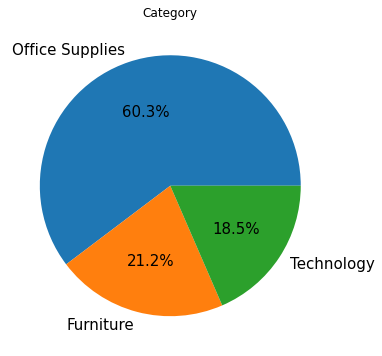

In [5]:
plt.figure(figsize=(6,6))
textprops ={"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%', textprops=textprops) 
plt.show() 

<Figure size 720x576 with 0 Axes>

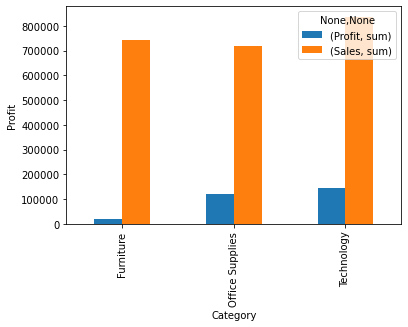

In [6]:
plt.figure(figsize=(10,8))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

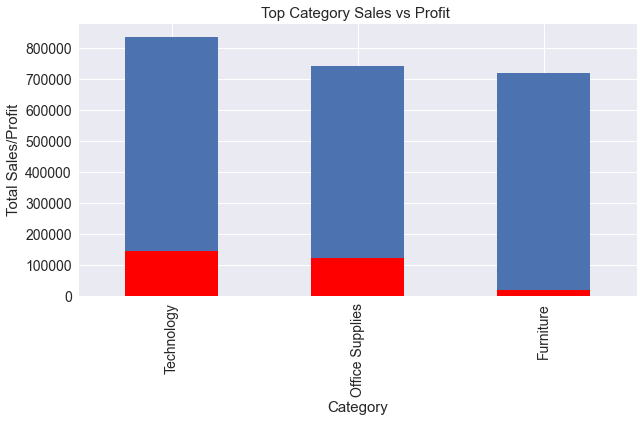

In [7]:
#computing top categories in terms of sales from first 100 observations
top_category_s=df.groupby("Category").Sales.sum().nlargest(n=100)
##computing top categories in terms of profit from first 100 observations
top_category_p=df.groupby("Category").Profit.sum().nlargest(n=100)

#plotting it to see usually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize=(10,5), fontsize=14)
top_category_p.plot(kind = 'bar',figsize=(10,5), fontsize=14,color='red')
plt.xlabel('Category', fontsize=15)
plt.ylabel('Total Sales/Profit', fontsize=15)
plt.title("Top Category Sales vs Profit ", fontsize=15)
plt.show() 

<AxesSubplot:ylabel='Sub-Category'>

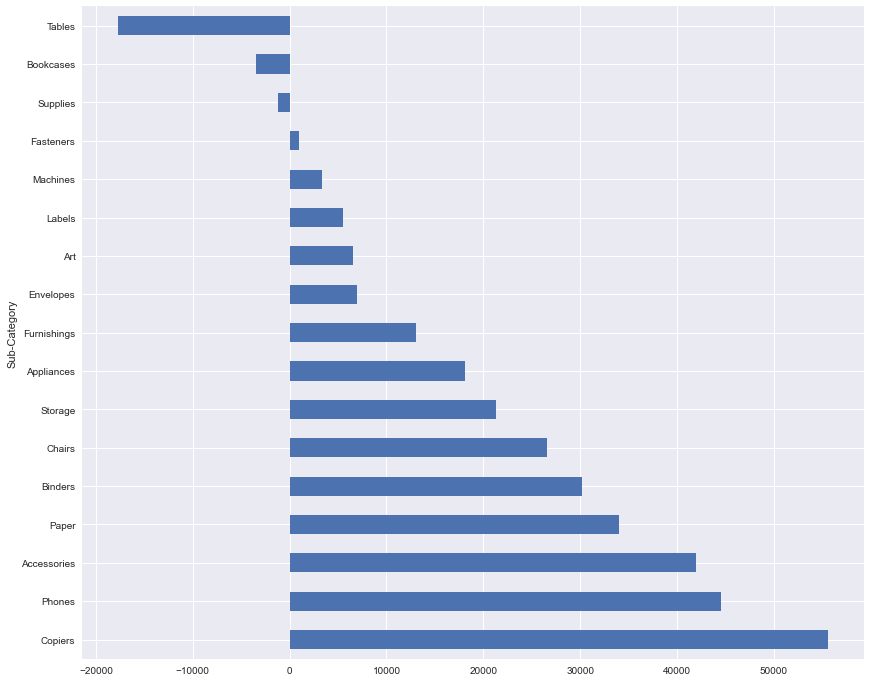

In [8]:
plt.figure(figsize=(14,12))
statewise=df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

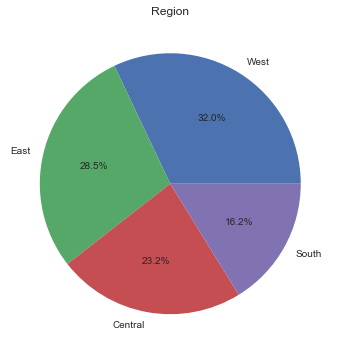

In [9]:
plt.figure(figsize=(6,6))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index, autopct='%1.1f%%')
plt.show()

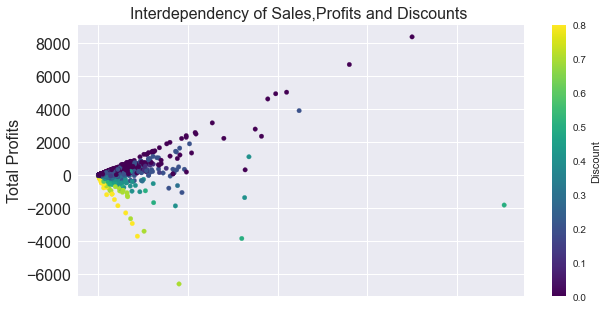

In [10]:
plt.style.use('seaborn')
df.plot(kind="scatter", figsize=(10,5), x="Sales", y="Profit", c="Discount", s=20, fontsize=16, colormap='viridis')
plt.ylabel('Total Profits', fontsize= 16)
plt.title("Interdependency of Sales,Profits and Discounts ", fontsize=16)
plt.show() 

# Conclusion :
#### *1) We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales*

#### *2) Considering the sub-categories sales of tables shoud be minimized*

#### *3) Increase sales more in the east as profit is more*

#### *4) We should concentarte on the states like'New York' and'California' to make more profits*